In [84]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

In [85]:
df=pd.read_csv(r"D:\programming\coding\codsoft_dataset\spam.csv",encoding='latin-1')

In [86]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [87]:
df=df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
df['v1'].value_counts()


v1
ham     4825
spam     747
Name: count, dtype: int64

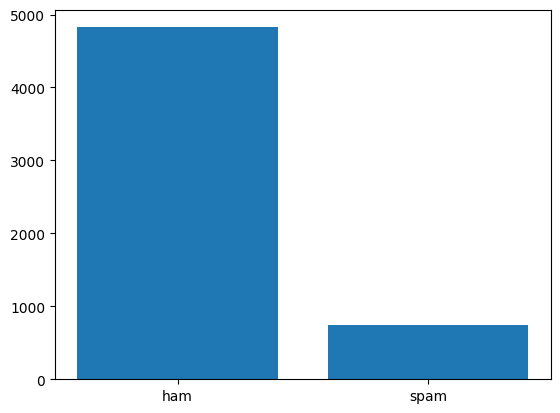

In [89]:
plt.bar(x=['ham','spam'],height=[4825,747])
plt.show()

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
embedder= TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)


In [91]:
x=df.iloc[:,1].values
y=df.iloc[:,0].values


In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [93]:
x_train=embedder.fit_transform(x_train)
x_test=embedder.transform(x_test)


In [94]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y_train=lr.fit_transform(y_train)
le_name_mapping = dict(zip(lr.classes_, lr.transform(lr.classes_)))
print(le_name_mapping)
y_test=lr.fit_transform(y_test)

{'ham': 0, 'spam': 1}


In [95]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred=lr_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9560538116591928


In [109]:
qu=['Congratulations you won the lottery! click the link below to claim it']
qu=embedder.transform(qu)
ans=lr_model.predict(qu)
if ans==[0]:
    print("its not a spam")
else:
    print("its a spam")

its a spam
